##State-Farm-Distracted-Driver-Detection

##CNN model

##import libraries

In [1]:
import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import cv2
import os  
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

## load Data 

In [2]:
from google.colab import files

files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                           Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          14129        409  1.0              
zusmani/petrolgas-prices-worldwide                                 Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33           1570         83  1.0              
ruchi798/data-science-job-salaries                                 Data Science Job Salaries                             7KB  2022-06-15 08:59:12           2718         89  1.0              
devansodari

In [3]:
! kaggle competitions download -c state-farm-distracted-driver-detection

100% 4.00G/4.00G [00:52<00:00, 112MB/s]
100% 4.00G/4.00G [00:52<00:00, 81.5MB/s]


In [4]:
! unzip /content/state-farm-distracted-driver-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/c7/img_56636.jpg  
  inflating: imgs/train/c7/img_56661.jpg  
  inflating: imgs/train/c7/img_56699.jpg  
  inflating: imgs/train/c7/img_56717.jpg  
  inflating: imgs/train/c7/img_56724.jpg  
  inflating: imgs/train/c7/img_56768.jpg  
  inflating: imgs/train/c7/img_56779.jpg  
  inflating: imgs/train/c7/img_56849.jpg  
  inflating: imgs/train/c7/img_56899.jpg  
  inflating: imgs/train/c7/img_56938.jpg  
  inflating: imgs/train/c7/img_5706.jpg  
  inflating: imgs/train/c7/img_57076.jpg  
  inflating: imgs/train/c7/img_57122.jpg  
  inflating: imgs/train/c7/img_57137.jpg  
  inflating: imgs/train/c7/img_5715.jpg  
  inflating: imgs/train/c7/img_57278.jpg  
  inflating: imgs/train/c7/img_57321.jpg  
  inflating: imgs/train/c7/img_57345.jpg  
  inflating: imgs/train/c7/img_57355.jpg  
  inflating: imgs/train/c7/img_5741.jpg  
  inflating: imgs/train/c7/img_57433.jpg  
  inflating: imgs/train/c7/img_5753.jpg  
  infla

##prepare data

In [5]:
def preparData(path):
  imagsList = []
  labels = []
  for dic in sorted(glob.glob(os.path.join(path,'*')), key = lambda k: k.split('/')[-1]):
    for imgs in glob.glob(os.path.join(dic, '*.jpg')):
      img = cv2.imread(imgs)
      img_r = cv2.resize(img,(128,128))
      imagsList.append(img_r)
      labels.append(int(dic.split("/")[-1].replace('c','')))
 ##split data  
  X_train, X_test, y_train, y_test = train_test_split(imagsList, labels, test_size=0.2,shuffle= True, random_state = 0)
  y_train = to_categorical(y_train)
  y_test  = to_categorical(y_test)

  return np.array(X_train), np.array(X_test), y_train, y_test

In [6]:
path_train = "/content/imgs/train/"
path_test  = "/content/imgs/test/"

X_train, X_test, y_train, y_test = preparData(path_train)

#shapes of traning and testing
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape: (17939, 128, 128, 3)
y_train shape: (17939, 10)
X_test shape:  (4485, 128, 128, 3)
y_test shape:  (4485, 10)


##Visualize examples of data

##classes :
            c0: Safe driving 
            c1: Texting - right 
            c2: Talking on the phone - right 
            c3: Texting - left
            c4: Talking on the phone - left
            c5: Operating the radio
            c6: Drinking
            c7: Reaching behind 
            c8: Hair and makeup 
            c9: Talking to passenger

(128, 128, 3)


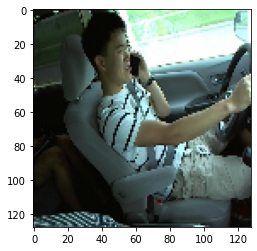

Class: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [7]:
print(X_train[402].shape)
img = X_train[402]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
print(f"Class: {y_train[402]}")

##2- Baseline CNN model

In [8]:
model= models.Sequential()
model.add(layers.InputLayer(input_shape=(128, 128, 3)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64,kernel_size = (5,5),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 128,kernel_size = (5,5),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 256,kernel_size = (5,5),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

In [10]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=20,validation_data=(X_test, y_test))

Epoch 1/10
897/897 [==============================] - 839s 934ms/step - loss: 0.8058 - accuracy: 0.7714 - val_loss: 0.2078 - val_accuracy: 0.9380
Epoch 2/10
897/897 [==============================] - 836s 932ms/step - loss: 0.1106 - accuracy: 0.9662 - val_loss: 0.0943 - val_accuracy: 0.9724
Epoch 3/10
897/897 [==============================] - 842s 939ms/step - loss: 0.0605 - accuracy: 0.9819 - val_loss: 0.0556 - val_accuracy: 0.9835
Epoch 4/10
897/897 [==============================] - 844s 941ms/step - loss: 0.0432 - accuracy: 0.9875 - val_loss: 0.0873 - val_accuracy: 0.9761
Epoch 5/10
897/897 [==============================] - 844s 941ms/step - loss: 0.0421 - accuracy: 0.9881 - val_loss: 0.0977 - val_accuracy: 0.9697
Epoch 6/10
897/897 [==============================] - 843s 940ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0587 - val_accuracy: 0.9839
Epoch 7/10
897/897 [==============================] - 843s 940ms/step - loss: 0.0282 - accuracy: 0.9919 - val_loss: 0.0506 -

In [12]:
#train
model.evaluate(X_train,y_train)

561/561 [==============================] - 214s 381ms/step - loss: 0.0033 - accuracy: 0.9993


[0.003296996233984828, 0.9993310570716858]

In [13]:
#test
model.evaluate(X_test,y_test)

141/141 [==============================] - 54s 384ms/step - loss: 0.0310 - accuracy: 0.9920


[0.031008414924144745, 0.9919732213020325]

In [14]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Analysis result

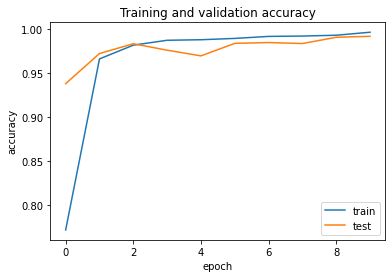

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

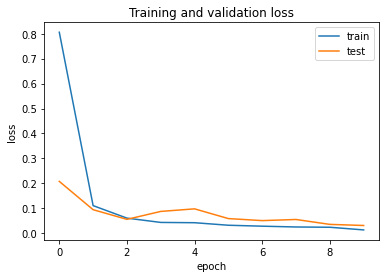

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

##save model

In [17]:
model.save('CNN_model.h5')